In [1]:
import pandas as pd
import geopandas as gpd

path = "C:/Users/Nissim/Desktop/Vacant Lots Project/vacant-lots-proj/vacancy_guncrime_dash/joined_gdf_centroids.geojson"

gdf = gpd.read_file(path)

gdf['opa_id'] = gdf['opa_id'].astype('string')

In [2]:
gdf.head()

,address,bldg_desc,opa_id,councildistrict,zipcode,type,owner,public_owner,comm_partn,li_complaints,li_code_violations,neighborhood,relevant_rcos,tree_canopy_gap,guncrime_density,geometry
0,3232 HENRY AVE,COM.CONDO.1STY MASONRY,882921188,4,19129,Lot,NEWCOURTLAND ELDER SVCS,False,NaN,NaN,NaN,Allegheny West,"East Falls Community Council; PO Box 12672, 19...",Top 50%,Bottom 50%,POINT (2687670.347 256881.319)
1,633 N 53RD ST,VAC LAND RES < ACRE,442316810,3,19131,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,NaN,Haddington,Parkside Association; Parkside Evans Recreatio...,Bottom 50%,Top 50%,POINT (2675594.486 242078.492)
2,2424 N MOLE ST,VAC LAND RES < ACRE,161064101,5,19132,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,NaN,Stanton,Uptown Entertainment and Development Corporati...,Bottom 50%,Top 5%,POINT (2694579.519 249996.821)
3,437 ARLINGTON ST,VAC LAND RES < ACRE,183194500,7,19122,Lot,MCHUGH JOHN,False,NaN,NaN,NaN,West Kensington,Zulu Nation RCO; 2045 N Lawrence Street\r\nPhi...,Top 50%,Top 50%,POINT (2699241.653 246723.548)
4,2735 N HICKS ST,VAC LAND RES < ACRE,111168200,8,19132,Lot,VICTORIA; HERBERT MITCHELL,False,NaN,NaN,NaN,Stanton,"Tioga United, Inc.; 1539 W. Venango Street \r\...",Top 10%,Top 5%,POINT (2695050.897 251708.887)


In [3]:
import requests

# Create the SQL query
opa_sql_query = "SELECT parcel_number, market_value FROM opa_properties_public"

# Make the GET request
opa_response = requests.get("https://phl.carto.com/api/v2/sql", params={"q": opa_sql_query})

# Get the data
opa_data = opa_response.json()["rows"]

# convert opa_data to a pandas dataframe
opa_df = pd.DataFrame(opa_data)

In [4]:
# return a random sample of 5 rows
opa_df.sample(5)

,parcel_number,market_value
206287,888181014,264600.0
304509,382175300,127900.0
455722,056286960,244800.0
334664,252140200,64200.0
185812,532124600,182400.0


In [5]:
# join the two dataframes such that opa_id = opa_number
joined_df = gdf.merge(opa_df, left_on='opa_id', right_on='parcel_number', how='left')

# drop the parcel_number column
joined_df = joined_df.drop(columns=['parcel_number'])

joined_df.head()

,address,bldg_desc,opa_id,councildistrict,zipcode,type,owner,public_owner,comm_partn,li_complaints,li_code_violations,neighborhood,relevant_rcos,tree_canopy_gap,guncrime_density,geometry,market_value
0,3232 HENRY AVE,COM.CONDO.1STY MASONRY,882921188,4,19129,Lot,NEWCOURTLAND ELDER SVCS,False,NaN,NaN,NaN,Allegheny West,"East Falls Community Council; PO Box 12672, 19...",Top 50%,Bottom 50%,POINT (2687670.347 256881.319),1499700.0
1,633 N 53RD ST,VAC LAND RES < ACRE,442316810,3,19131,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,NaN,Haddington,Parkside Association; Parkside Evans Recreatio...,Bottom 50%,Top 50%,POINT (2675594.486 242078.492),8100.0
2,2424 N MOLE ST,VAC LAND RES < ACRE,161064101,5,19132,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,NaN,Stanton,Uptown Entertainment and Development Corporati...,Bottom 50%,Top 5%,POINT (2694579.519 249996.821),17400.0
3,437 ARLINGTON ST,VAC LAND RES < ACRE,183194500,7,19122,Lot,MCHUGH JOHN,False,NaN,NaN,NaN,West Kensington,Zulu Nation RCO; 2045 N Lawrence Street\r\nPhi...,Top 50%,Top 50%,POINT (2699241.653 246723.548),49000.0
4,2735 N HICKS ST,VAC LAND RES < ACRE,111168200,8,19132,Lot,VICTORIA; HERBERT MITCHELL,False,NaN,NaN,NaN,Stanton,"Tioga United, Inc.; 1539 W. Venango Street \r\...",Top 10%,Top 5%,POINT (2695050.897 251708.887),21700.0


In [6]:
import requests

# Create the SQL query
delinq_sql_query = "SELECT * FROM real_estate_tax_delinquencies"

# Make the GET request
delinq_response = requests.get("https://phl.carto.com/api/v2/sql", params={"q": delinq_sql_query})

# Get the data
delinq_data = delinq_response.json()["rows"]

# convert delinq_data to a pandas dataframe
delinq_df = pd.DataFrame(delinq_data)

In [7]:
delinq_df.shape

(54401, 56)

In [8]:
cols_to_keep = ['opa_number', 
                'principal_due', 
                'penalty_due',
                'interest_due', 
                'other_charges_due', 
                'total_due', 
                'is_actionable',
                'payment_agreement', 
                'num_years_owed', 
                'most_recent_year_owed',
                'oldest_year_owed', 
                'most_recent_payment_date',
                'year_of_last_assessment', 
                'total_assessment', 
                'taxable_assessment',
                'mailing_address', 
                'mailing_city', 
                'mailing_state', 
                'mailing_zip',
                'return_mail', 
                'building_code',
                'exempt_abatement_assessment',
                'homestead_value', 
                'net_tax_value_after_homestead', 
                'agreement_agency',
                'sequestration_enforcement', 
                'bankruptcy', 
                'years_in_bankruptcy',
                'most_recent_bankrupt_year', 
                'oldest_bankrupt_year',
                'principal_sum_bankrupt_years', 
                'total_amount_bankrupt_years',
                'sheriff_sale',
                'assessment_under_appeal', 
                'year_month']

# keep only the columns in cols_to_keep
delinq_df = delinq_df[cols_to_keep]

In [9]:
delinq_df.head()

,opa_number,principal_due,penalty_due,interest_due,other_charges_due,total_due,is_actionable,payment_agreement,num_years_owed,most_recent_year_owed,...,sequestration_enforcement,bankruptcy,years_in_bankruptcy,most_recent_bankrupt_year,oldest_bankrupt_year,principal_sum_bankrupt_years,total_amount_bankrupt_years,sheriff_sale,assessment_under_appeal,year_month
0,41011800,299.69,20.98,69.68,139.63,529.98,true,false,1,2019,...,false,false,NaN,NaN,NaN,NaN,NaN,N,false,202206
1,41015500,921.99,77.65,240.65,470.43,1726.29,true,false,2,2019,...,false,false,NaN,NaN,NaN,NaN,NaN,N,false,202206
2,41016000,7619.08,543.33,9438.88,3208.38,20809.67,false,true,22,2019,...,false,false,NaN,NaN,NaN,NaN,NaN,N,false,202206
3,41018800,761.43,45.69,39.97,260.39,1107.48,true,false,1,2021,...,false,false,NaN,NaN,NaN,NaN,NaN,N,false,202206
4,41019900,3259.56,221.12,785.51,1484.86,5751.05,true,false,6,2021,...,false,false,NaN,NaN,NaN,NaN,NaN,N,false,202206


In [10]:
red_cols_to_keep = ['opa_number', 
                    'total_due', 
                    'is_actionable',
                    'payment_agreement', 
                    'num_years_owed', 
                    'most_recent_year_owed', 
                    'total_assessment',
                    'sheriff_sale']


red_delinq_df = delinq_df[red_cols_to_keep]


red_delinq_df.head()

,opa_number,total_due,is_actionable,payment_agreement,num_years_owed,most_recent_year_owed,total_assessment,sheriff_sale
0,41011800,529.98,true,false,1,2019,41800.0,N
1,41015500,1726.29,true,false,2,2019,44200.0,N
2,41016000,20809.67,false,true,22,2019,44200.0,N
3,41018800,1107.48,true,false,1,2021,47300.0,N
4,41019900,5751.05,true,false,6,2021,43800.0,N


In [11]:
# convert opa_number to an object
red_delinq_df['opa_number'] = red_delinq_df['opa_number'].astype('string')

C:\Users\Nissim\AppData\Local\Temp\ipykernel_36096\482365560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_delinq_df['opa_number'] = red_delinq_df['opa_number'].astype('string')


In [12]:
# join the two dataframes such that opa_id = opa_number
full_df = joined_df.merge(red_delinq_df, left_on='opa_id', right_on='opa_number', how='left')

full_df.head()

,address,bldg_desc,opa_id,councildistrict,zipcode,type,owner,public_owner,comm_partn,li_complaints,...,geometry,market_value,opa_number,total_due,is_actionable,payment_agreement,num_years_owed,most_recent_year_owed,total_assessment,sheriff_sale
0,3232 HENRY AVE,COM.CONDO.1STY MASONRY,882921188,4,19129,Lot,NEWCOURTLAND ELDER SVCS,False,NaN,NaN,...,POINT (2687670.347 256881.319),1499700.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,633 N 53RD ST,VAC LAND RES < ACRE,442316810,3,19131,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,...,POINT (2675594.486 242078.492),8100.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2424 N MOLE ST,VAC LAND RES < ACRE,161064101,5,19132,Lot,REDEVELOPMENT AUTHORITY OF PHILADELPHIA,True,NaN,NaN,...,POINT (2694579.519 249996.821),17400.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,437 ARLINGTON ST,VAC LAND RES < ACRE,183194500,7,19122,Lot,MCHUGH JOHN,False,NaN,NaN,...,POINT (2699241.653 246723.548),49000.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2735 N HICKS ST,VAC LAND RES < ACRE,111168200,8,19132,Lot,VICTORIA; HERBERT MITCHELL,False,NaN,NaN,...,POINT (2695050.897 251708.887),21700.0,111168200,10867.88,true,false,25.0,2021.0,7900.0,N


In [13]:
import numpy as np

# Define the conditions and values to assign for each condition
cond1 = full_df["public_owner"]
val1 = "Deed from City"

cond2 = (~full_df["public_owner"]) & (full_df["opa_number"].isna())
val2 = "Work with owner"

cond3 = (~full_df["public_owner"]) & (full_df["opa_number"].notna()) & (full_df["num_years_owed"] > 3)
val3 = "Sherrif's sale"

cond4 = (~full_df["public_owner"]) & (full_df["opa_number"].notna()) & (full_df["num_years_owed"] <= 3) & (full_df["owner"].str.contains("LLC"))
val4 = "Force foreclosure"

cond5 = (~full_df["public_owner"]) & (full_df["opa_number"].notna()) & (full_df["num_years_owed"] <= 3) & (~full_df["owner"].str.contains("LLC")) & (full_df["market_value"] < 100000)
val5 = "Buy from owner"

cond6 = (~full_df["public_owner"]) & (full_df["opa_number"].notna()) & (full_df["num_years_owed"] <= 3) & (~full_df["owner"].str.contains("LLC")) & (full_df["market_value"] >= 100000)
val6 = "Turn over to developer"

# Use np.select to create the new column based on the conditions and values
full_df["acquisition_process"] = np.select([cond1, cond2, cond3, cond4, cond5, cond6], [val1, val2, val3, val4, val5, val6], default="Too complicated")


In [14]:
tree_cond1 = (full_df["guncrime_density"] == "Bottom 50%") & ((full_df["tree_canopy_gap"] == "Bottom 50%") | (full_df["tree_canopy_gap"] == "Top 50%"))
tree_val1 = "Low Priority"

tree_cond2 = ((full_df["guncrime_density"] == "Top 50%") & ((full_df["tree_canopy_gap"] == "Bottom 50%") | (full_df["tree_canopy_gap"] == "Top 50%"))) | ((full_df["guncrime_density"] == "Bottom 50%") & ~((full_df["tree_canopy_gap"] == "Bottom 50%") | (full_df["tree_canopy_gap"] == "Top 50%")))
tree_val2 = "Medium Priority"

full_df["priority_level"] = np.select([tree_cond1, tree_cond2], [tree_val1, tree_val2], default="High Priority")

In [15]:
import random

# Replace "df" with the name of your geopandas dataframe
for i in range(10):
    row_index = random.randint(0, len(full_df) - 1)
    print(full_df.loc[row_index, 'priority_level'])

High Priority
Low Priority
Medium Priority
High Priority
Medium Priority
High Priority
High Priority
Medium Priority
High Priority
High Priority


<AxesSubplot: >

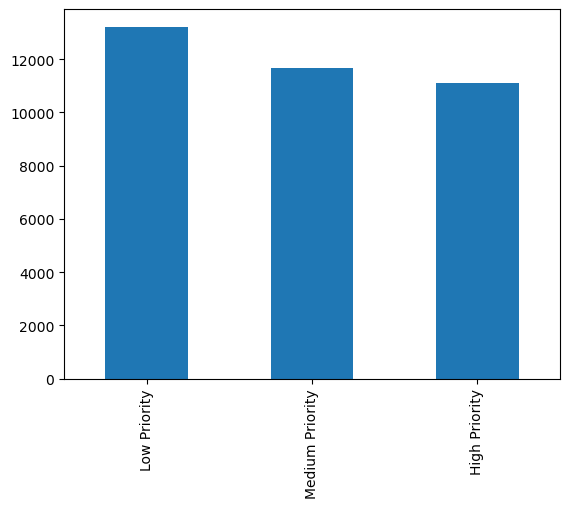

In [16]:
# add a bar chart of parcels by priority level
full_df['priority_level'].value_counts().plot(kind='bar')

<AxesSubplot: >

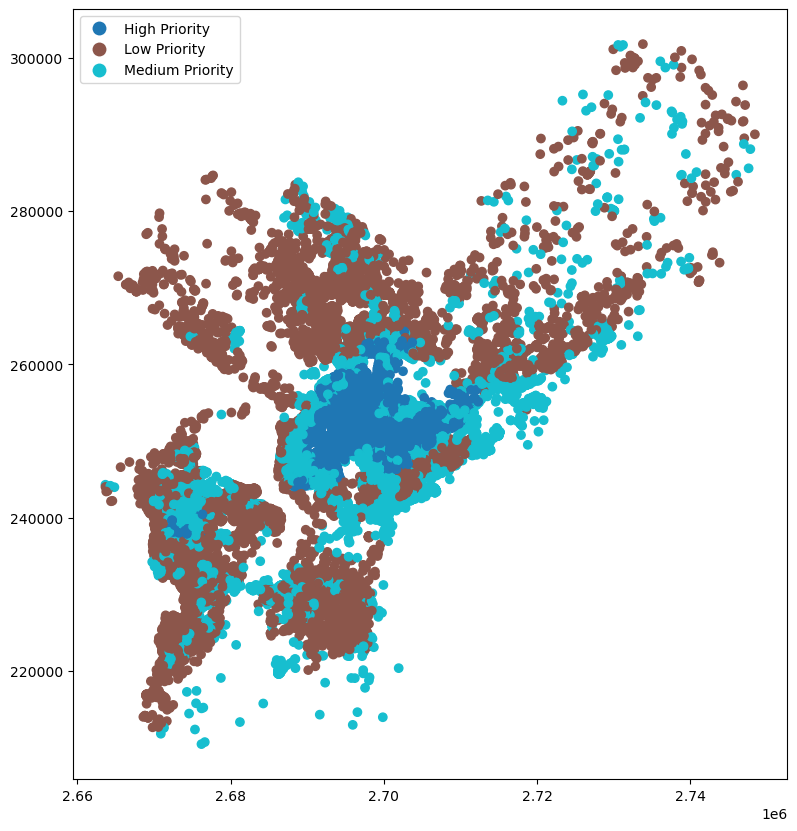

In [17]:
# map the parcels by priority level
full_df.plot(column='priority_level', figsize = (10, 10), legend=True)

c:\Users\Nissim\.conda\envs\vac_props_guncrime_dash\Lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
c:\Users\Nissim\.conda\envs\vac_props_guncrime_dash\Lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


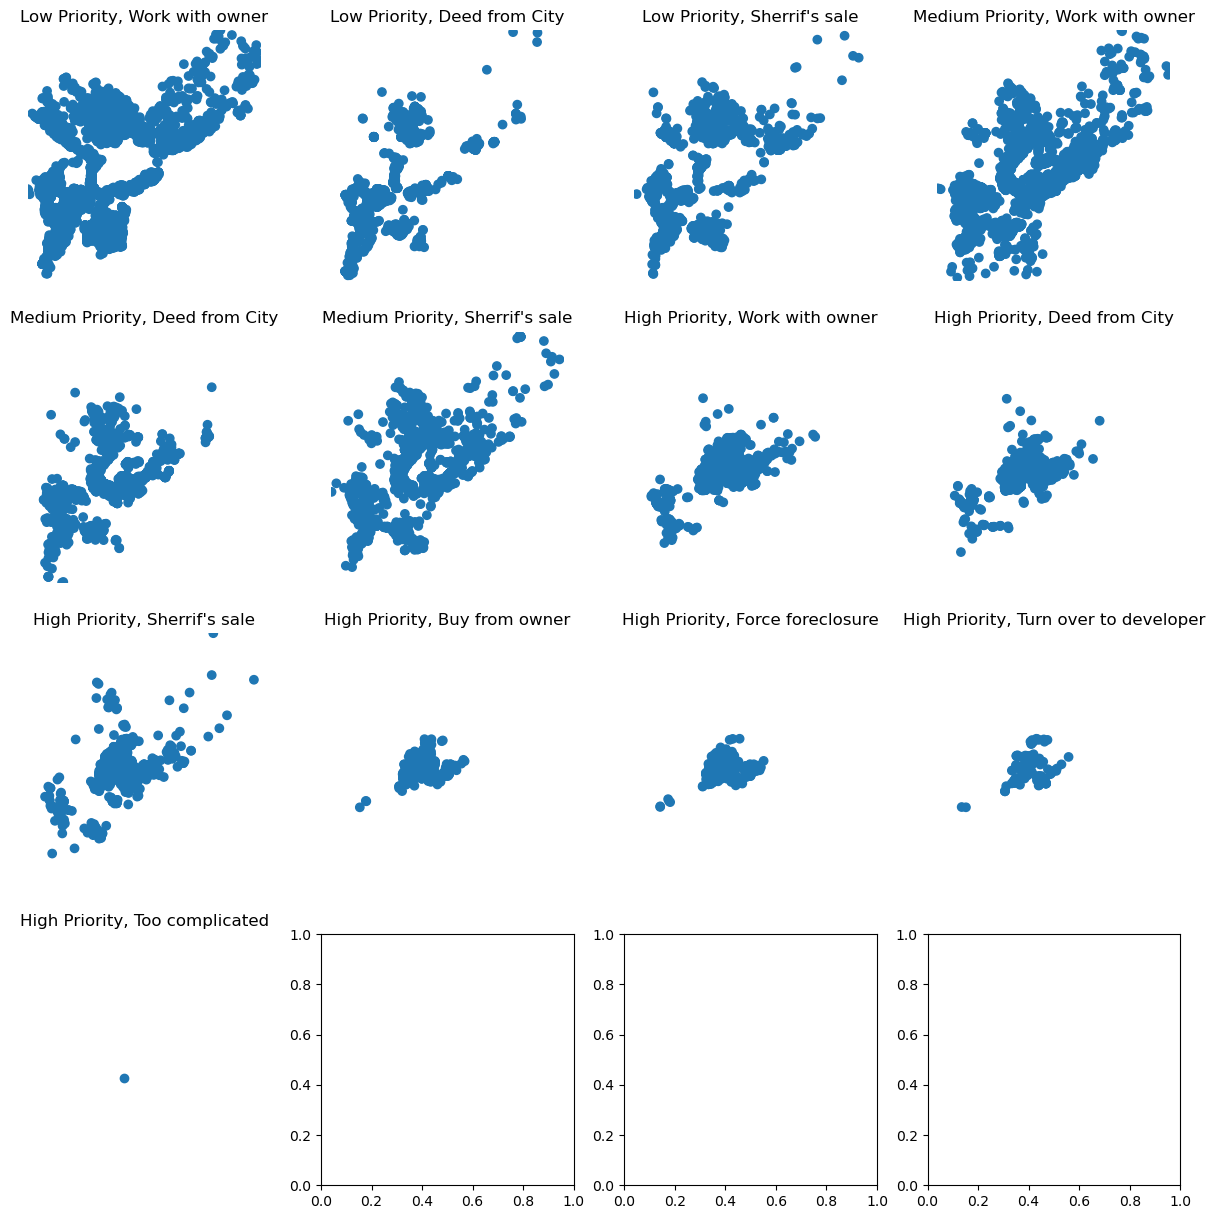

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(15, 15))
ax = ax.reshape(-1) # convert ax to a 1-dimensional array

# calculate the minimum and maximum values of the x and y coordinates of all data points
min_x, max_x = full_df.total_bounds[0], full_df.total_bounds[2]
min_y, max_y = full_df.total_bounds[1], full_df.total_bounds[3]

for i, priority_level in enumerate(full_df['priority_level'].unique()):
    for j, acquisition_process in enumerate(full_df['acquisition_process'].unique()):
        idx = i*3 + j # calculate the index of the subplot in the 1-dimensional array
        full_df[(full_df['priority_level'] == priority_level) & (full_df['acquisition_process'] == acquisition_process)].plot(column='acquisition_process', ax=ax[idx], legend=False)
        ax[idx].set_title(f'{priority_level}, {acquisition_process}')
        ax[idx].axis('off')
        ax[idx].set_xlim(min_x, max_x) # set the same xlim for all subplots
        ax[idx].set_ylim(min_y, max_y) # set the same ylim for all subplots

plt.show()


In [38]:
def add_relevant_info(row):
    if row['acquisition_process'] == 'Deed from City':
        relevant_info = f"This parcel at {row['address']} is owned by the City of Philadelphia. It is a {row['type'].lower()} worth ${row['market_value']}, but you should be able to receive a deed from the City for $1. To do so, you will need to contact the Councilmember from District {row['councildistrict']} and also the relevant RCO, which is {row['relevant_rcos']}. The gun crime rate at this site is in the {row['guncrime_density'].lower()} citywide, and it is in the {row['tree_canopy_gap'].lower()} for tree canopy coverage, which makes it a {row['priority_level'].lower()} site for intervention."
    # Add other conditions here for different values of acquisition_process, if needed
    elif row['acquisition_process'] == "Work with owner":
        relevant_info = f"This parcel at {row['address']} is privately owned by {row['owner']}. It is a {row['type'].lower()} worth ${row['market_value']}. The gun crime rate at this site is in the {row['guncrime_density'].lower()} citywide, and it is in the {row['tree_canopy_gap'].lower()} for tree canopy coverage, which makes it a {row['priority_level'].lower()} site for intervention."
    # Add other conditions here for different values of acquisition_process, if needed
    elif row['acquisition_process'] == "Force foreclosure":
        relevant_info = f"This parcel at {row['address']} is privately owned by {row['owner']}, which is an LLC. It has been tax delinquent since {row['most_recent_year_owed']} and owes a total of ${row['total_due']}. It should be possible to force foreclosure under Act 135. To do so, you will need to contact the Councilmember from the {row['councildistrict']} district and also the relevant RCO, which is {row['relevant_rcos']}. The gun crime rate at this site is in the {row['guncrime_density'].lower()} citywide, and it is in the {row['tree_canopy_gap'].lower()} for tree canopy coverage, which makes it a {row['priority_level'].lower()} site for intervention."
    # Add other conditions here for different values of acquisition_process, if needed
    elif row['acquisition_process'] == "Buy from owner":
        relevant_info = f"This parcel at {row['address']} is privately owned by {row['owner']}, who is a private individual. It has been tax delinquent since {row['most_recent_year_owed']} and owes a total of ${row['total_due']}. It is a {row['type'].lower()} worth ${row['market_value']}, which means it is affordable enough that your organization may want to consider purchasing the property. For support, consider conctacting the Councilmember from the {row['councildistrict']} district and also the relevant RCO, which is {row['relevant_rcos']}. The gun crime rate at this site is in the {row['guncrime_density'].lower()} citywide, and it is in the {row['tree_canopy_gap'].lower()} for tree canopy coverage, which makes it a {row['priority_level'].lower()} site for intervention."
    # Add other conditions here for different values of acquisition_process, if needed
    elif row['acquisition_process'] == "Turn over to developer":
        relevant_info = f"This parcel at {row['address']} is privately owned by {row['owner']}, who is a private individual. It has been tax delinquent since {row['most_recent_year_owed']} and owes a total of ${row['total_due']}. It is a {row['type'].lower()} worth ${row['market_value']}, which means it is expensive enough that it may be out of reach for your organization. However, it may be of interest to a private developer. With this in mind, consider contacting a developer whom you trust to work on the site, or preparing a community benefits agreement to ensure that your community benefits from the site's development. For support, consider conctacting the Councilmember from the {row['councildistrict']} district and also the relevant RCO, which is {row['relevant_rcos']}. The gun crime rate at this site is in the {row['guncrime_density'].lower()} citywide, and it is in the {row['tree_canopy_gap'].lower()} for tree canopy coverage, which makes it a {row['priority_level'].lower()} site for intervention."
    # Add other conditions here for different values of acquisition_process, if needed
    elif row['acquisition_process'] == "Too complicated":
        relevant_info = f"Based on the ownership and price of this property at {row['address']}, it is likely too complicated to be worth intervening in. The gun crime rate at this site is in the {row['guncrime_density'].lower()} citywide, and it is in the {row['tree_canopy_gap'].lower()} for tree canopy coverage, which makes it a {row['priority_level'].lower()} site for intervention."
    # Add other conditions here for different values of acquisition_process, if needed
    else:
        relevant_info = "Unknown acquisition process"
    return relevant_info

# Replace "df" with the name of your geopandas dataframe
full_df['relevant_info'] = full_df.apply(add_relevant_info, axis=1)

In [39]:
import random

# Replace "df" with the name of your geopandas dataframe
for i in range(10):
    row_index = random.randint(0, len(full_df) - 1)
    print(full_df.loc[row_index, 'relevant_info'])


This parcel at 2421 N PHILIP ST is privately owned by ROBINSON ADELINE; ROBINSON GEO M, who is a private individual. It has been tax delinquent since 2021.0 and owes a total of $2213.35. It is a lot worth $44800.0, which means it is affordable enough that your organization may want to consider purchasing the property. For support, consider conctacting the Councilmember from the 7 district and also the relevant RCO, which is Zulu Nation RCO; 2045 N Lawrence Street
Philadelphia, PA 19133; zulunationcdc@gmail.com; 2155205686. The gun crime rate at this site is in the top 25% citywide, and it is in the top 25% for tree canopy coverage, which makes it a high priority site for intervention.
This parcel at 1739 saint paul st is privately owned by RUBY; JAMES GODWIN. It is a building worth $66800.0. The gun crime rate at this site is in the bottom 50% citywide, and it is in the bottom 50% for tree canopy coverage, which makes it a low priority site for intervention.
This parcel at 2912 w arizo

In [18]:
# import the promise zone shapefile
pz = gpd.read_file('C:/Users/Nissim/Desktop/Vacant Lots Project/Philadelphia_Promise_Zone.shp').to_crs(epsg=2272)

# clip the joined_gdf to the promise zone
pz_gdf = gpd.clip(full_df, pz)

<AxesSubplot: >

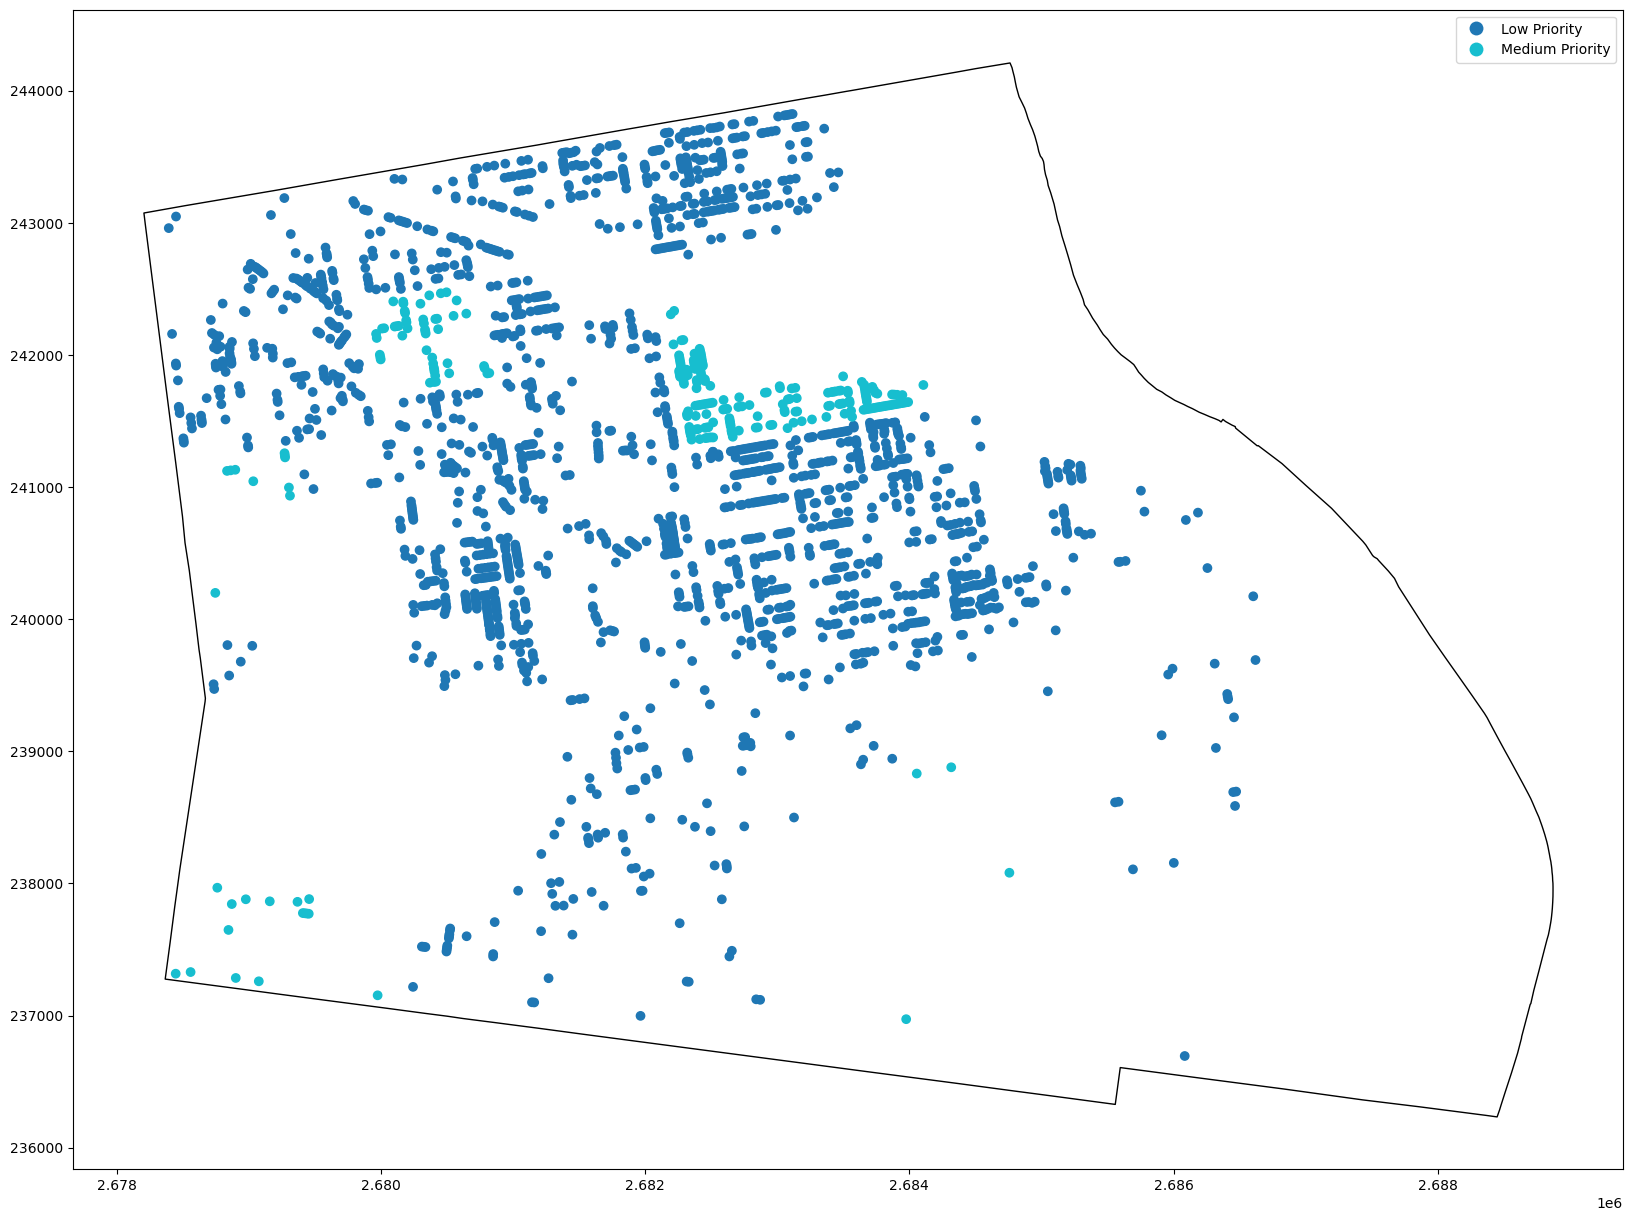

In [36]:
# map the parcels by priority level
ax = pz.plot(color='white', edgecolor='black', figsize=(20,20))
pz_gdf.plot(ax=ax, column='priority_level', figsize = (10, 10), legend=True)

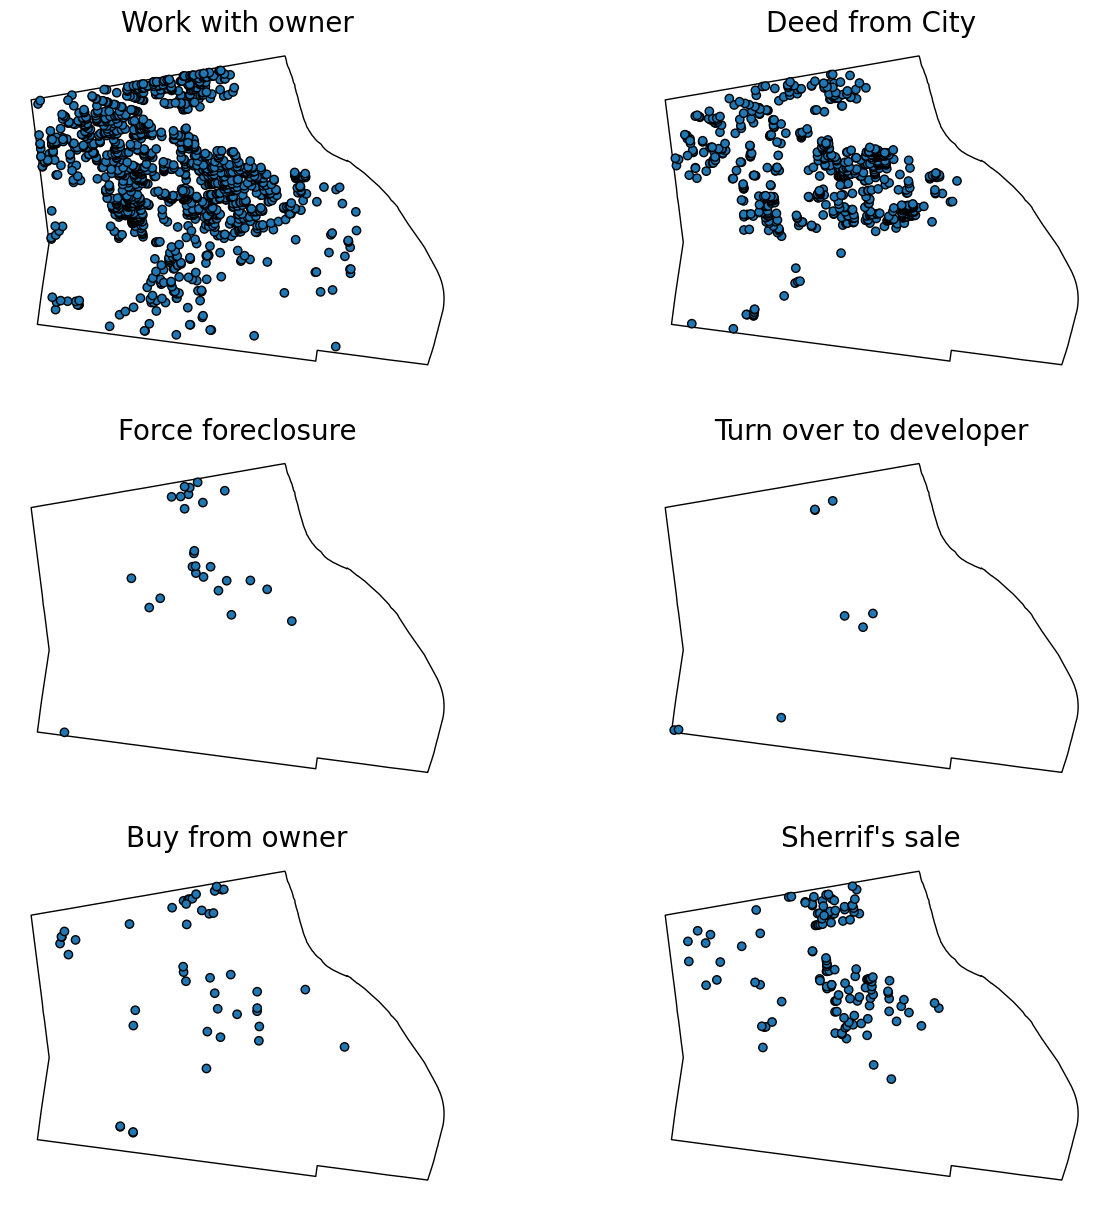

In [25]:
import matplotlib.pyplot as plt

# Get unique categories in acquisition_process
categories = pz_gdf['acquisition_process'].unique()

# Calculate number of rows and columns based on the number of categories
num_rows = int(len(categories) / 2) + 1 if len(categories) % 2 == 1 else int(len(categories) / 2)
num_cols = 2

# Create figure and axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop through each category and create a subplot
for i, category in enumerate(categories):
    
    # Calculate row and column index for subplot
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Filter the dataframe to only include parcels in the current category
    category_pz_gdf = pz_gdf[pz_gdf['acquisition_process'] == category]
    
    # Plot the pz shape as a background image on the current subplot
    pz.plot(ax=axs[row_index, col_index], color='white', edgecolor='black')
    
    # Plot the parcels in the current category on the current subplot
    category_pz_gdf.plot(ax=axs[row_index, col_index], column='acquisition_process', legend=False, 
                         cmap='tab20', edgecolor='black')
    
    # Set the title of the current subplot to the current category
    axs[row_index, col_index].set_title(category, fontsize=20)
    
    # Remove tick marks from the current subplot
    axs[row_index, col_index].set_xticks([])
    axs[row_index, col_index].set_yticks([])
    
    # Remove borders from the current subplot
    for spine in axs[row_index, col_index].spines.values():
        spine.set_visible(False)

# Hide any unused subplots
for i in range(len(categories), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    axs[row_index, col_index].axis('off')

# Show the plots
plt.show()


<AxesSubplot: >

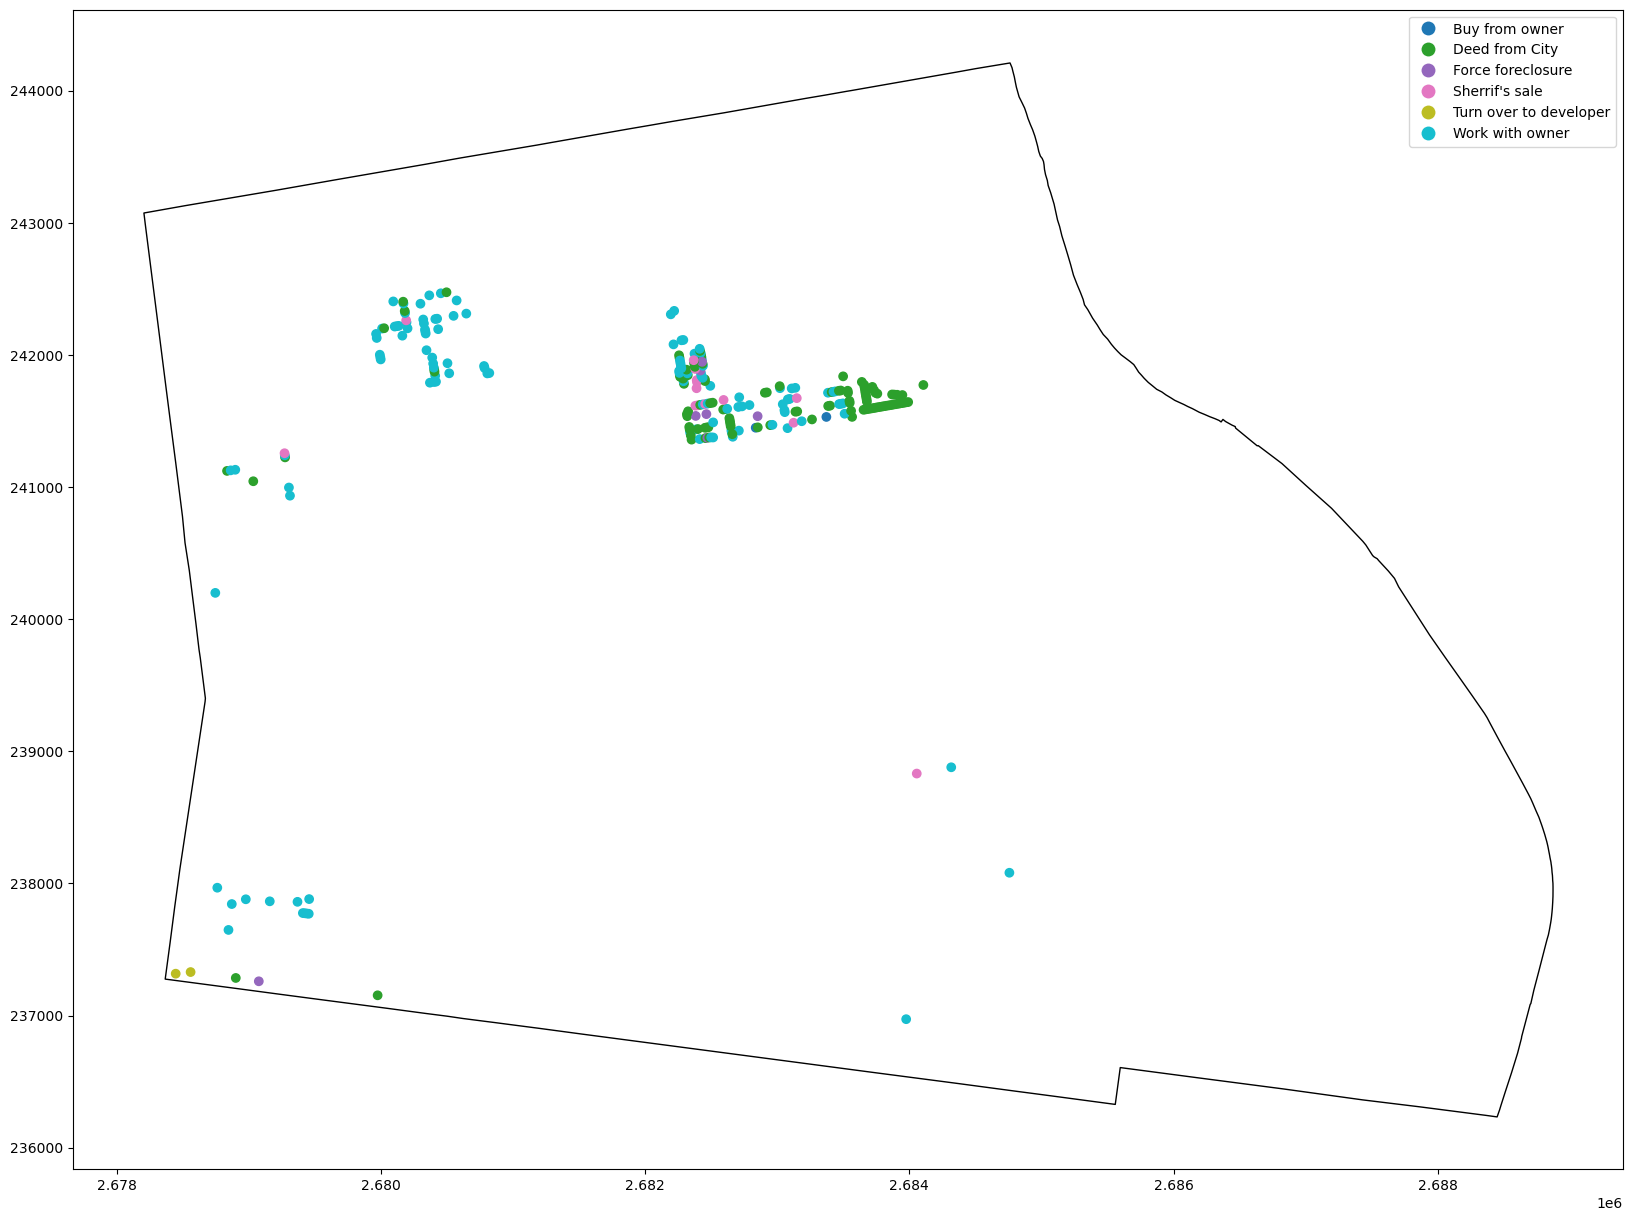

In [26]:
# map parcels that are medium or high priority by acquisition process
ax = pz.plot(color='white', edgecolor='black', figsize=(20,20))
pz_gdf[pz_gdf['priority_level'] != 'Low Priority'].plot(ax=ax, column='acquisition_process', figsize = (20, 20), legend=True)

IndexError: index 2 is out of bounds for axis 0 with size 2

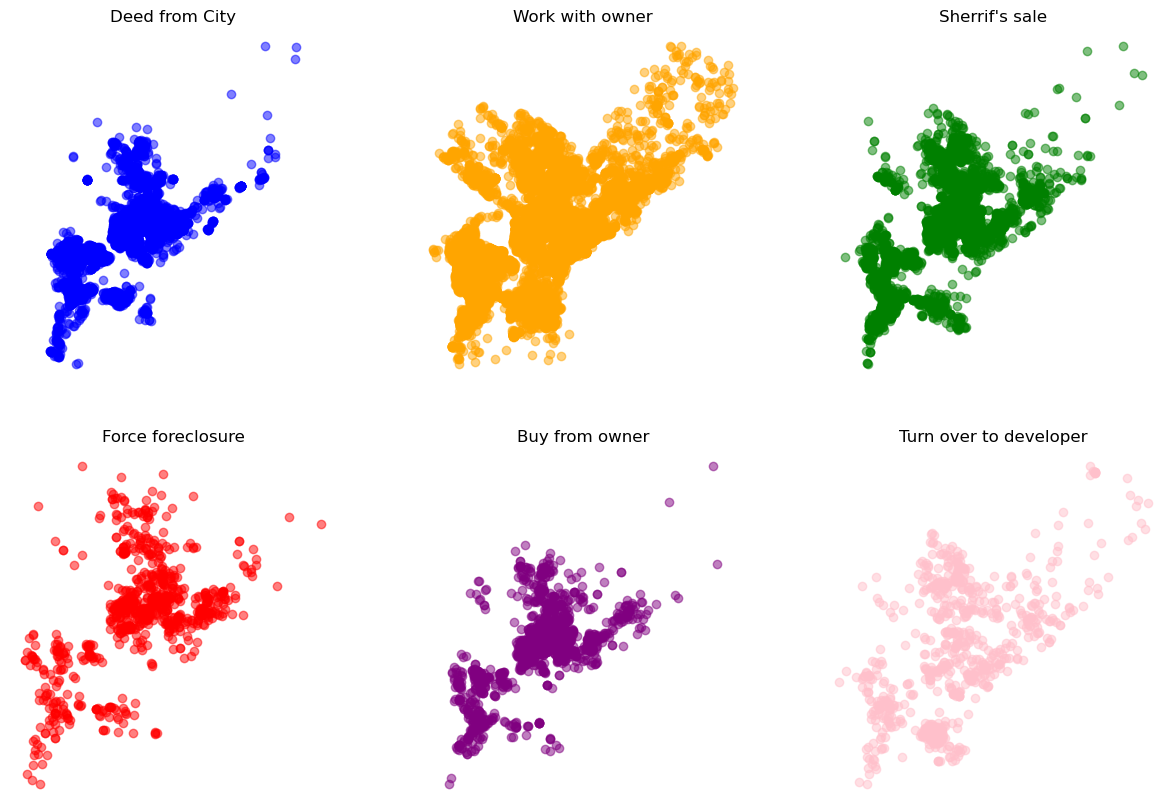

In [28]:
import matplotlib.pyplot as plt

# Create a list of colors for each value of acquisition_process
colors = ["blue", "orange", "green", "red", "purple", "pink"]

values = ["Deed from City", "Work with owner", "Sherrif's sale", "Force foreclosure", "Buy from owner", "Turn over to developer", "Too complicated"]

# Create five separate maps for each of the five values of acquisition_process
# Then loop through them to create five subplots in a 2 x 3 grid
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, value in enumerate(values):
    full_df[full_df["acquisition_process"] == value].plot(ax=ax[i//3, i%3], color=colors[i], alpha=0.5, legend=True)
    ax[i//3, i%3].set_title(value)
    ax[i//3, i%3].axis("off")
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

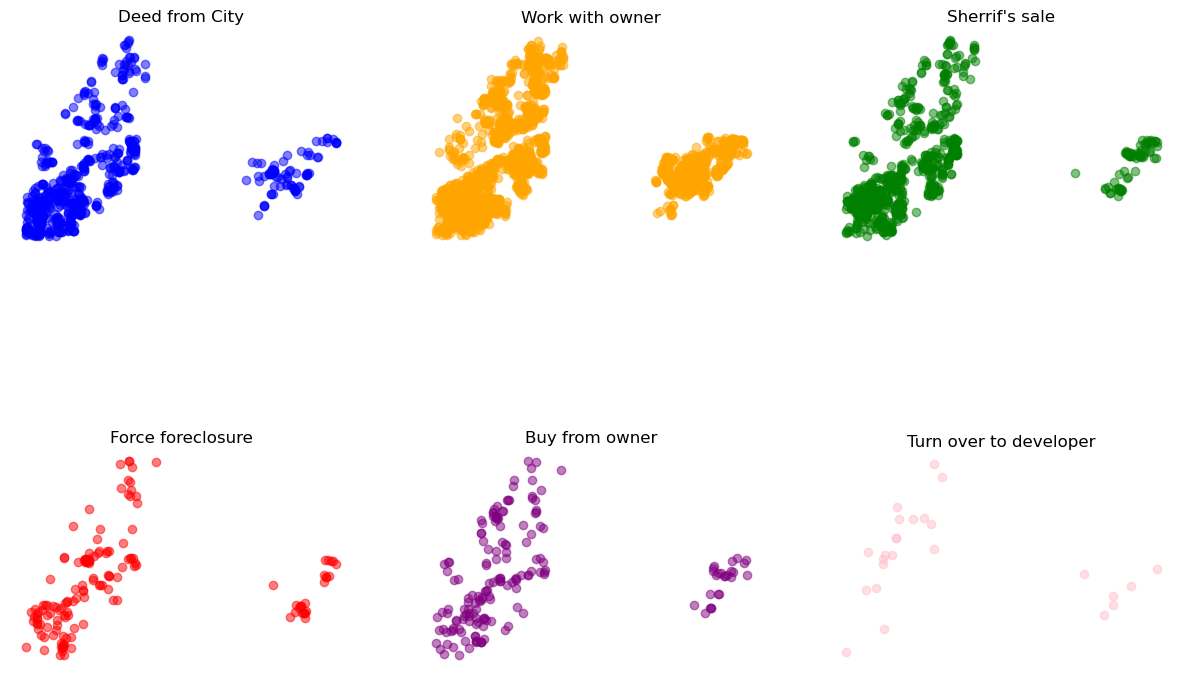

In [29]:
# repeat the plots from the previous cell, but this time include only data where guncrime_density is either "Top 10%", "Top 5%", or "Top 1%"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, value in enumerate(values):
    full_df[(full_df["acquisition_process"] == value) & (full_df["guncrime_density"].isin(["Top 10%", "Top 5%", "Top 1%"]))].plot(ax=ax[i//3, i%3], color=colors[i], alpha=0.5, legend=True)
    ax[i//3, i%3].set_title(value)
    ax[i//3, i%3].axis("off")
plt.show()

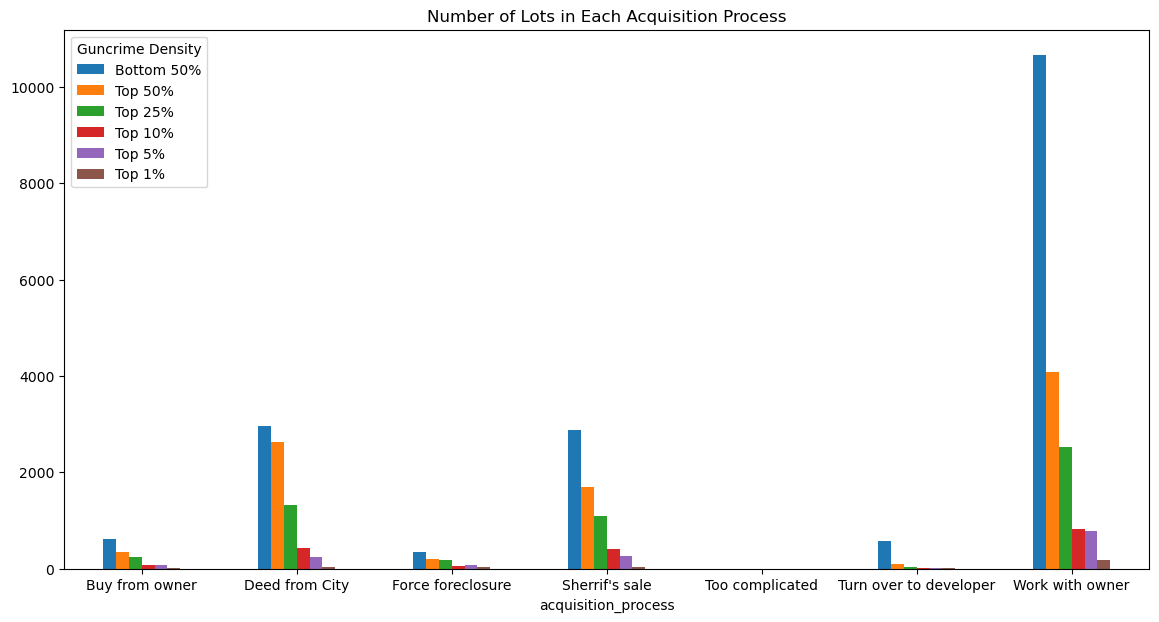

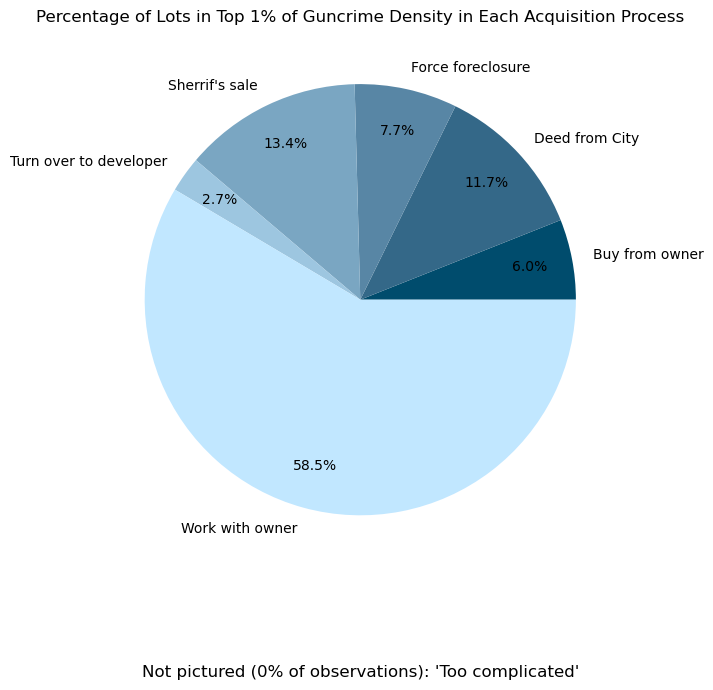

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# create a new categorical column with the desired ordering
ordering = ['Bottom 50%', 'Top 50%', 'Top 25%', 'Top 10%', 'Top 5%', 'Top 1%']
cats = pd.Categorical(full_df['guncrime_density'], categories=ordering, ordered=True)

# create a cross-tabulation between acquisition_process and guncrime_density
xtab = pd.crosstab(full_df['acquisition_process'], cats)

# sort the columns of the cross-tabulation based on the ordering
xtab = xtab[ordering]

# plot a stacked bar chart
ax = xtab.plot(kind='bar', stacked=False, figsize=(14, 7), rot=0)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Guncrime Density')
ax.set_title('Number of Lots in Each Acquisition Process')
plt.show()

# set a monochrome color scheme
colors = ["#004c6d",
            "#346888",
            "#5886a5",
            "#7aa6c2",
            "#9dc6e0",
            "#c1e7ff"]

# create a pie chart showing what percentage of lots in the top 1% of guncrime are in each acquisition_process category
xtab_filtered = xtab.loc[xtab.index != 'Too complicated', 'Top 1%']
ax = xtab_filtered.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', colors=colors, title='Percentage of Lots in Top 1% of Guncrime Density in Each Acquisition Process', pctdistance=0.8, labeldistance=1.1)

# remove the default legend
ax.legend().remove()

# remove the y axis label
ax.set_ylabel('')

# add a subtitle
ax.text(0.5, -0.2, "Not pictured (0% of observations): 'Too complicated'", transform=ax.transAxes, ha='center', fontsize=12)

plt.show()

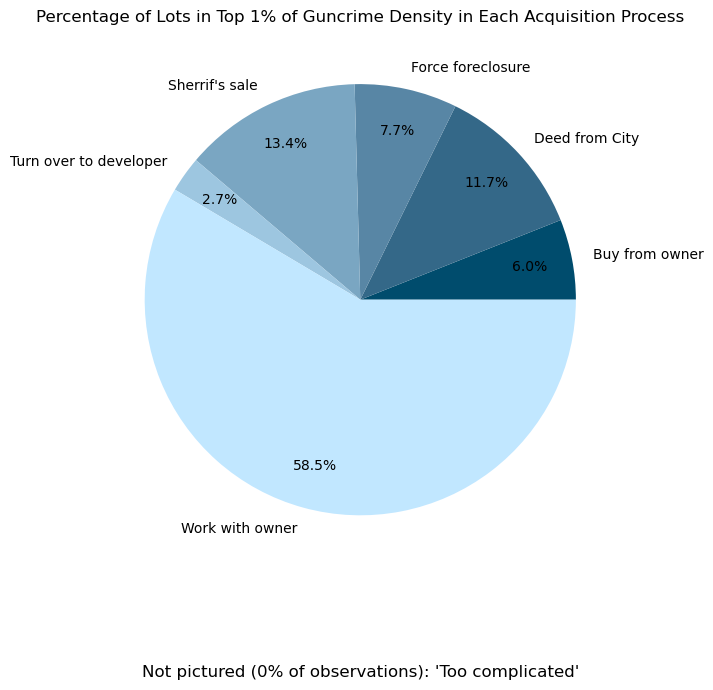

In [31]:
import matplotlib.pyplot as plt

# set a monochrome color scheme
colors = ["#004c6d",
            "#346888",
            "#5886a5",
            "#7aa6c2",
            "#9dc6e0",
            "#c1e7ff"]

# create a pie chart showing what percentage of lots in the top 1% of guncrime are in each acquisition_process category
xtab_filtered = xtab.loc[xtab.index != 'Too complicated', 'Top 1%']
ax = xtab_filtered.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', colors=colors, title='Percentage of Lots in Top 1% of Guncrime Density in Each Acquisition Process', pctdistance=0.8, labeldistance=1.1)

# remove the default legend
ax.legend().remove()

# remove the y axis label
ax.set_ylabel('')

# add a subtitle
ax.text(0.5, -0.2, "Not pictured (0% of observations): 'Too complicated'", transform=ax.transAxes, ha='center', fontsize=12)

plt.show()

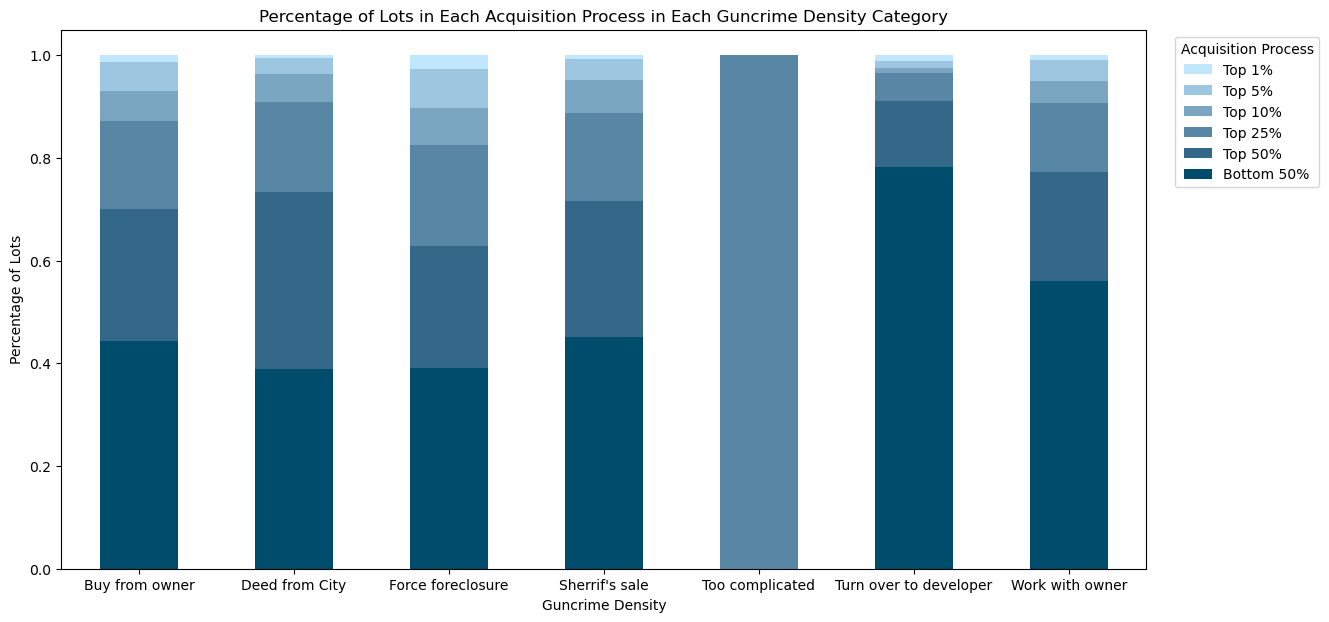

In [32]:
# create a heatmap showing the percentage of lots in each acquisition_process category in each guncrime_density category
xtab_pct = xtab.div(xtab.sum(axis=1), axis=0)
ax = xtab_pct.plot(kind='bar', stacked=True, figsize=(14, 7), rot=0, color=colors, title='Percentage of Lots in Each Acquisition Process in Each Guncrime Density Category')
ax.set_xlabel('Guncrime Density')
ax.set_ylabel('Percentage of Lots')

# reverse the order of the legend handles and labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Acquisition Process', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

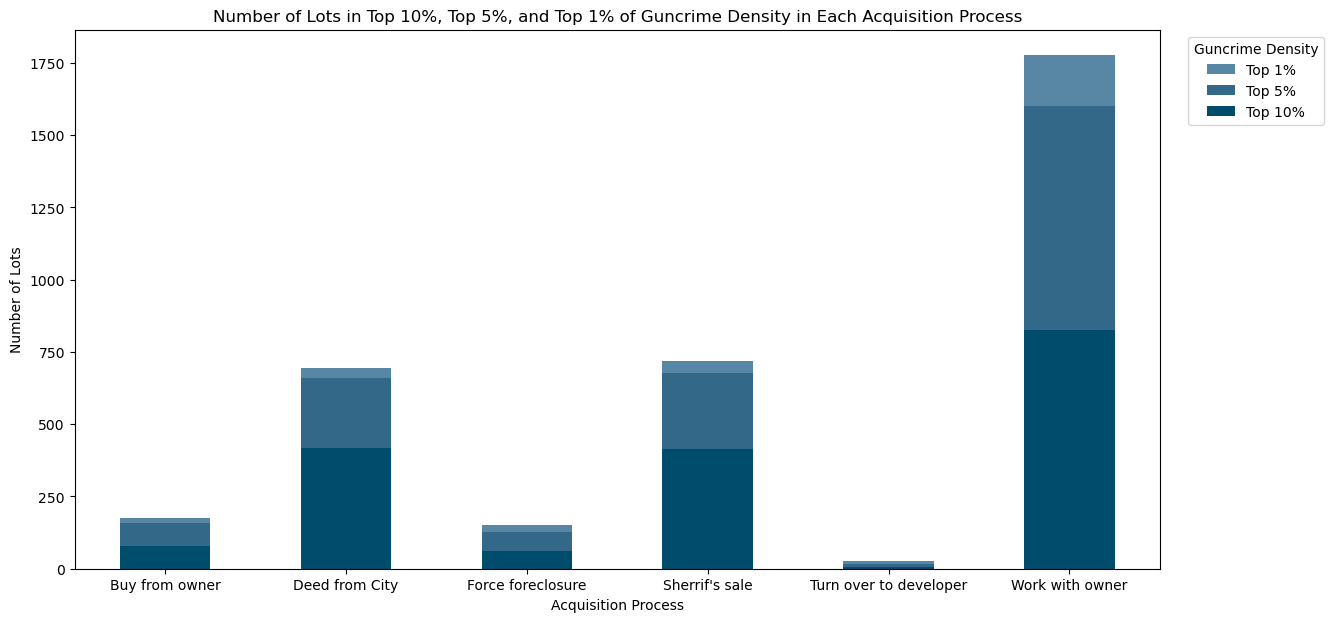

In [33]:
# show a bar plot that simply indicates the number of lots in the top 10%, top 5%, and top 1% of guncrime density in each acquisition_process category
xtab_filtered = xtab.loc[xtab.index != 'Too complicated', ['Top 10%', 'Top 5%', 'Top 1%']]
ax = xtab_filtered.plot(kind='bar', stacked=True, figsize=(14, 7), rot=0, color=colors, title='Number of Lots in Top 10%, Top 5%, and Top 1% of Guncrime Density in Each Acquisition Process')
ax.set_xlabel('Acquisition Process')
ax.set_ylabel('Number of Lots')

# reverse the order of the legend handles and labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Guncrime Density', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()